### Prediksi Lagu Hit di Spotify Menggunakan The Spotify Dataset
Anggota Kelompok: 


1.   Satrio Hanif Wicaksono (05111940000103)
2.   Dyandra Paramitha Widyadhana (05111940000119)
3. Erza Janitradevi (05111940000153)



#Introduksi
Spotify dikenal sebagai layanan streaming musik yang memiliki lebih dari 30 juta lagu sebagai pilihan. Dengan pesatnya kemajuan teknologi sekarang, dan dengan majunya kesadaran masyarakat mengenai kelegalan dalam dunia permusikan, banyak yang sudah beralih untuk mendengarkan musik melalui layanan ini, bukan saja di Indonesia akan tetapi seluruh dunia. <br>
Saat ini Spotify memiliki lebih dari 345 juta pengguna. Dengan jumlah pengguna yang sangat banyak, perubahan preferensi musik terjadi secara signifikan setiap tahunnya. Perubahan preferensi ini dapat dilihat dari lagu-lagu tenar yang muncul akibat jumlah pendengarnya yang signifikan. Dari latar belakang ini, kami tertarik untuk memprediksi lagu-lagu apa yang akan menjadi lagu tenar/hit ke depannya menggunakan data Spotify yang telah ada. Dengan melakukan prediksi data ini, kami juga ingin mengetahui apakah terdapat interaksi atau hubungan antara musik dan data itu sendiri, serta menganalisis apakah terdapat faktor-faktor yang memungkinkan sebuah lagu untuk menjadi sebuah lagu hit di Spotify. 

## Penjelasan Dataset
Sebelum dilakukan analisis perlu diketahui dahulu beberapa atribut penting yang kami gunakan dalam dataset :


*   **Key**: integer untuk memetakan nada menggunakan notasi standar Pitch Class. Contoh 0 = C, 1 = C♯/D♭, 2 = D, dan seterusnya. Jika tidak ada kunci yang terdeteksi, nilainya -1.
*  **Mode** : Mode menunjukkan modality (mayor atau minor) dari sebuah track, jenis tangga nada dari mana melodinya berasal. Mayor diwakili oleh 1 dan minor adalah 0.
*   **Acousticness** : Acoustiness menunjukkan seberapa acoustic track diukur dari 0.0 track yang paling tidak acoustic sampai 1.0 track yang paling acoustic.
*   **Danceability** : Danceability menggambarkan seberapa cocok track untuk menari berdasarkan kombinasi elemen musik termasuk tempo, stabilitas ritme, kekuatan ketukan, dan keteraturan keseluruhan. Nilai 0.0 adalah paling tidak cocok untuk menari dan 1.0 adalah paling cocok untuk menari.
*   **Energy** : Energi adalah pengukuran dari 0.0 hingga 1.0 untuk mewakili ukuran intensitas dan aktivitas. Biasanya track energetic, terasa cepat, keras, dan berisik.
*   **Instrumentalness** : Memprediksi apakah track tersebut tidak berisi vokal. Semakin dekat nilai instrumental menjadi 1.0, semakin besar kemungkinan track tersebut tidak berisi konten vokal.
*   **Loudness** : Kenyaringan keseluruhan track dalam desibel (dB). Nilai tipikal berkisar antara -60 dan 0 dB.
*   **Valence** : Ukuran dari 0.0 hingga 1.0 yang menggambarkan deposition musik yang disampaikan oleh suatu track.
*   **Tempo** : Perkiraan tempo keseluruhan track dalam ketukan per menit (BPM).
*   **Popularity** : Popularitas track, nilainya antara 0 sampai 100, dengan 100 menjadi yang paling populer.



# Data Scrapping
Untuk mengumpulkan dataset yang dibutuhkan, kami melakukan scrapping sendiri dengan memanfaatkan library Spotipy dan Spotify Developer. 

Untuk file Data Scrapping dapat dilihat di: https://colab.research.google.com/drive/1ZzqKuhTTkDnB7gQP_f7RHfhtYa17ibab?usp=sharing


# Data Preparation

## Import Library
Pada bagian ini, kami mengompilasi semua library yang akan digunakan untuk mendukung berjalannya program. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler # untuk melakukan standarisasi value
from sklearn.model_selection import train_test_split # untuk melakukan splitting data

# untuk membuat model pada data
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB


# metrics akurasi
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# metrics cross check validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

# neural network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install --upgrade tensorflow

## Membaca Data
Terdapat dua dataset yang digunakan yaitu Data Train dan Data Test. 

In [ ]:
dataset = pd.read_csv('spotify-train.csv')
test = pd.read_csv('spotify-predict.csv')

In [ ]:
dataset.head()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,artist,track_name,popularity,success
0,0.546,0.1220,106.891,0.0437,0.6560,0.000000,4,0.727,0,197333,-4.572,0.690,1,Gera MX,Botella Tras Botella,85,1
1,0.842,0.0599,114.029,0.0687,0.0872,0.000008,4,0.703,0,216540,-4.173,0.715,0,Calum Scott,Rise,72,1
2,0.684,0.2190,139.984,0.0544,0.3430,0.000009,4,0.787,5,178714,-7.162,0.785,0,Azahriah,El Barto,56,1
3,0.443,0.2850,93.503,0.0263,0.2120,0.000142,4,0.612,2,125341,-10.668,0.641,1,Björgvin Halldórsson,Snæfinnur snjókarl,36,1
4,0.355,0.1350,123.007,0.0584,0.8460,0.000000,4,0.692,10,250000,-10.658,0.467,1,Jace Chan,隔離 - Studio Live Duet,50,1


In [ ]:
dataset.shape

(4918, 17)

In [ ]:
dataset.dtypes

energy              float64
liveness            float64
tempo               float64
speechiness         float64
acousticness        float64
instrumentalness    float64
time_signature        int64
danceability        float64
key                   int64
duration_ms           int64
loudness            float64
valence             float64
mode                  int64
artist               object
track_name           object
popularity            int64
success               int64
dtype: object

In [ ]:
dataset.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,success
count,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000
mean,0.620129,0.174417,121.432260,0.086122,0.297689,0.087115,3.961163,0.636500,5.296869,219594.413379,-7.390102,0.487050,0.587027,54.933306,0.480683
std,0.203337,0.144240,28.235421,0.086448,0.292486,0.233356,0.284357,0.149248,3.583189,64940.113725,3.390918,0.236299,0.492418,23.916650,0.499678
min,0.007560,0.019600,46.509000,0.023000,0.000002,0.000000,1.000000,0.130000,0.000000,44000.000000,-27.331000,0.026200,0.000000,0.000000,0.000000
25%,0.493000,0.093900,99.790750,0.036400,0.041425,0.000000,4.000000,0.537000,2.000000,180764.250000,-8.822750,0.299250,0.000000,45.000000,0.000000
50%,0.644000,0.118000,120.910000,0.050400,0.191000,0.000006,4.000000,0.648000,5.000000,208983.000000,-6.782500,0.481000,1.000000,59.000000,0.000000
75%,0.773000,0.197000,139.021000,0.092375,0.513000,0.002118,4.000000,0.746000,8.000000,241389.500000,-5.115000,0.680000,1.000000,73.000000,1.000000
max,1.000000,0.987000,227.895000,0.723000,0.994000,0.972000,5.000000,0.980000,11.000000,824133.000000,1.906000,0.975000,1.000000,100.000000,1.000000


Dapat dilihat dari code bawah bahwa terdapat perbedaan antara lagu hit dan lagu yang memiliki popularitas tinggi apabila menggunakan Data Spotify. Tidak semua lagu yang sedang viral/hit memiliki popularitas yang tinggi maupun sebaliknya. \

In [ ]:
dataset[dataset['success'] == 0].sort_values(by='popularity', ascending=False).head(12)

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,artist,track_name,popularity,success
4333,0.525,0.0921,80.870,0.0944,0.44000,0.000007,4,0.761,11,238805,-6.900,0.5310,1,Glass Animals,Heat Waves,90,0
3710,0.508,0.3840,178.818,0.1520,0.29700,0.000000,4,0.610,8,137876,-6.682,0.7580,0,Lil Nas X,MONTERO (Call Me By Your Name),88,0
4256,0.521,0.1230,85.012,0.0329,0.06780,0.149000,4,0.588,10,260173,-9.461,0.3370,1,The Neighbourhood,Daddy Issues,88,0
3439,0.796,0.0442,110.108,0.1030,0.04920,0.000000,4,0.666,10,164842,-6.967,0.6100,0,Camila Cabello,Don't Go Yet,88,0
4076,0.819,0.1730,101.968,0.1060,0.02610,0.000354,4,0.891,8,217773,-3.964,0.7680,1,J Balvin,Qué Más Pues?,87,0
2832,0.593,0.1240,124.917,0.0379,0.41800,0.000000,4,0.841,1,162803,-7.846,0.8080,1,Travis Scott,Goosebumps - Remix,86,0
2748,0.825,0.0674,102.977,0.0601,0.00883,0.000000,4,0.702,6,203064,-3.787,0.9150,0,Dua Lipa,Levitating (feat. DaBaby),85,0
2810,0.740,0.1670,116.879,0.0284,0.01150,0.006780,4,0.640,4,216320,-4.083,0.7850,1,Tame Impala,The Less I Know The Better,85,0
2401,0.797,0.2600,120.041,0.0533,0.00543,0.001370,4,0.611,6,218107,-7.627,0.5180,0,BØRNS,Electric Love,85,0
4711,0.710,0.0956,127.975,0.0292,0.14500,0.115000,4,0.733,5,239600,-5.849,0.9650,0,Foster The People,Pumped Up Kicks,85,0


In [ ]:
dataset.isnull().sum()

energy              0
liveness            0
tempo               0
speechiness         0
acousticness        0
instrumentalness    0
time_signature      0
danceability        0
key                 0
duration_ms         0
loudness            0
valence             0
mode                0
artist              0
track_name          0
popularity          0
success             0
dtype: int64

## Melakukan Normalisasi pada Data
Min-Max Scaling bekerja dengan scaling data/menyesuaikan data dalam rentang/range tertentu (range nilai minimum hingga nilai maksimum), dengan rentang yang biasa digunakan adalah 0 hingga 1.<br><br>
Tujuan normalisasi adalah untuk mengubah nilai kolom numerik dalam kumpulan data ke skala yang sama, tanpa mengganggu perbedaan dalam rentang nilai. Untuk pembelajaran mesin, setiap set data tidak memerlukan normalisasi. Ini diperlukan hanya jika fitur memiliki rentang yang berbeda.


In [ ]:
scaler = MinMaxScaler() 

scaled_values = scaler.fit_transform(dataset[['tempo', 'key', 'duration_ms','loudness', 'popularity']]) 
dataset[['tempo', 'key', 'duration_ms','loudness', 'popularity']] = scaled_values

scaled_values = scaler.fit_transform(test[['tempo', 'key', 'duration_ms','loudness', 'popularity']]) 
test[['tempo', 'key', 'duration_ms','loudness', 'popularity']] = scaled_values

dataset.describe()

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,popularity,success
count,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000,4918.000000
mean,0.620129,0.174417,0.413060,0.086122,0.297689,0.087115,3.961163,0.636500,0.481534,0.225083,0.682043,0.487050,0.587027,0.549333,0.480683
std,0.203337,0.144240,0.155665,0.086448,0.292486,0.233356,0.284357,0.149248,0.325744,0.083242,0.115980,0.236299,0.492418,0.239166,0.499678
min,0.007560,0.019600,0.000000,0.023000,0.000002,0.000000,1.000000,0.130000,0.000000,0.000000,0.000000,0.026200,0.000000,0.000000,0.000000
25%,0.493000,0.093900,0.293748,0.036400,0.041425,0.000000,4.000000,0.537000,0.181818,0.175309,0.633042,0.299250,0.000000,0.450000,0.000000
50%,0.644000,0.118000,0.410180,0.050400,0.191000,0.000006,4.000000,0.648000,0.454545,0.211481,0.702825,0.481000,1.000000,0.590000,0.000000
75%,0.773000,0.197000,0.510028,0.092375,0.513000,0.002118,4.000000,0.746000,0.727273,0.253020,0.759859,0.680000,1.000000,0.730000,1.000000
max,1.000000,0.987000,1.000000,0.723000,0.994000,0.972000,5.000000,0.980000,1.000000,1.000000,1.000000,0.975000,1.000000,1.000000,1.000000


In [ ]:
dataset[dataset['success'] == 0].sort_values(by='popularity', ascending=False).head(12)

,energy,liveness,tempo,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode,artist,track_name,popularity,success
4333,0.525,0.0921,0.189436,0.0944,0.44000,0.000007,4,0.761,1.000000,0.249707,0.698806,0.5310,1,Glass Animals,Heat Waves,0.90,0
3710,0.508,0.3840,0.729433,0.1520,0.29700,0.000000,4,0.610,0.727273,0.120333,0.706263,0.7580,0,Lil Nas X,MONTERO (Call Me By Your Name),0.88,0
4256,0.521,0.1230,0.212271,0.0329,0.06780,0.149000,4,0.588,0.909091,0.277098,0.611212,0.3370,1,The Neighbourhood,Daddy Issues,0.88,0
3439,0.796,0.0442,0.350628,0.1030,0.04920,0.000000,4,0.666,0.909091,0.154899,0.696515,0.6100,0,Camila Cabello,Don't Go Yet,0.88,0
4076,0.819,0.1730,0.305751,0.1060,0.02610,0.000354,4,0.891,0.727273,0.222748,0.799227,0.7680,1,J Balvin,Qué Más Pues?,0.87,0
2832,0.593,0.1240,0.432272,0.0379,0.41800,0.000000,4,0.841,0.090909,0.152286,0.666450,0.8080,1,Travis Scott,Goosebumps - Remix,0.86,0
2748,0.825,0.0674,0.311314,0.0601,0.00883,0.000000,4,0.702,0.545455,0.203893,0.805281,0.9150,0,Dua Lipa,Levitating (feat. DaBaby),0.85,0
2810,0.740,0.1670,0.387957,0.0284,0.01150,0.006780,4,0.640,0.363636,0.220885,0.795157,0.7850,1,Tame Impala,The Less I Know The Better,0.85,0
2401,0.797,0.2600,0.405390,0.0533,0.00543,0.001370,4,0.611,0.545455,0.223176,0.673941,0.5180,0,BØRNS,Electric Love,0.85,0
4711,0.710,0.0956,0.449131,0.0292,0.14500,0.115000,4,0.733,0.454545,0.250726,0.734754,0.9650,0,Foster The People,Pumped Up Kicks,0.85,0


## EDA (Exploratory Data Analysis)
EDA kami lakukan untuk lebih mengenal data dan relasi antar feature/atribut. Ada berbagai library yang dapat digunakan untuk melakukan EDA dan berbagai methode. 

### Histogram Untuk Melihat Distribusi dari Setiap Fitur

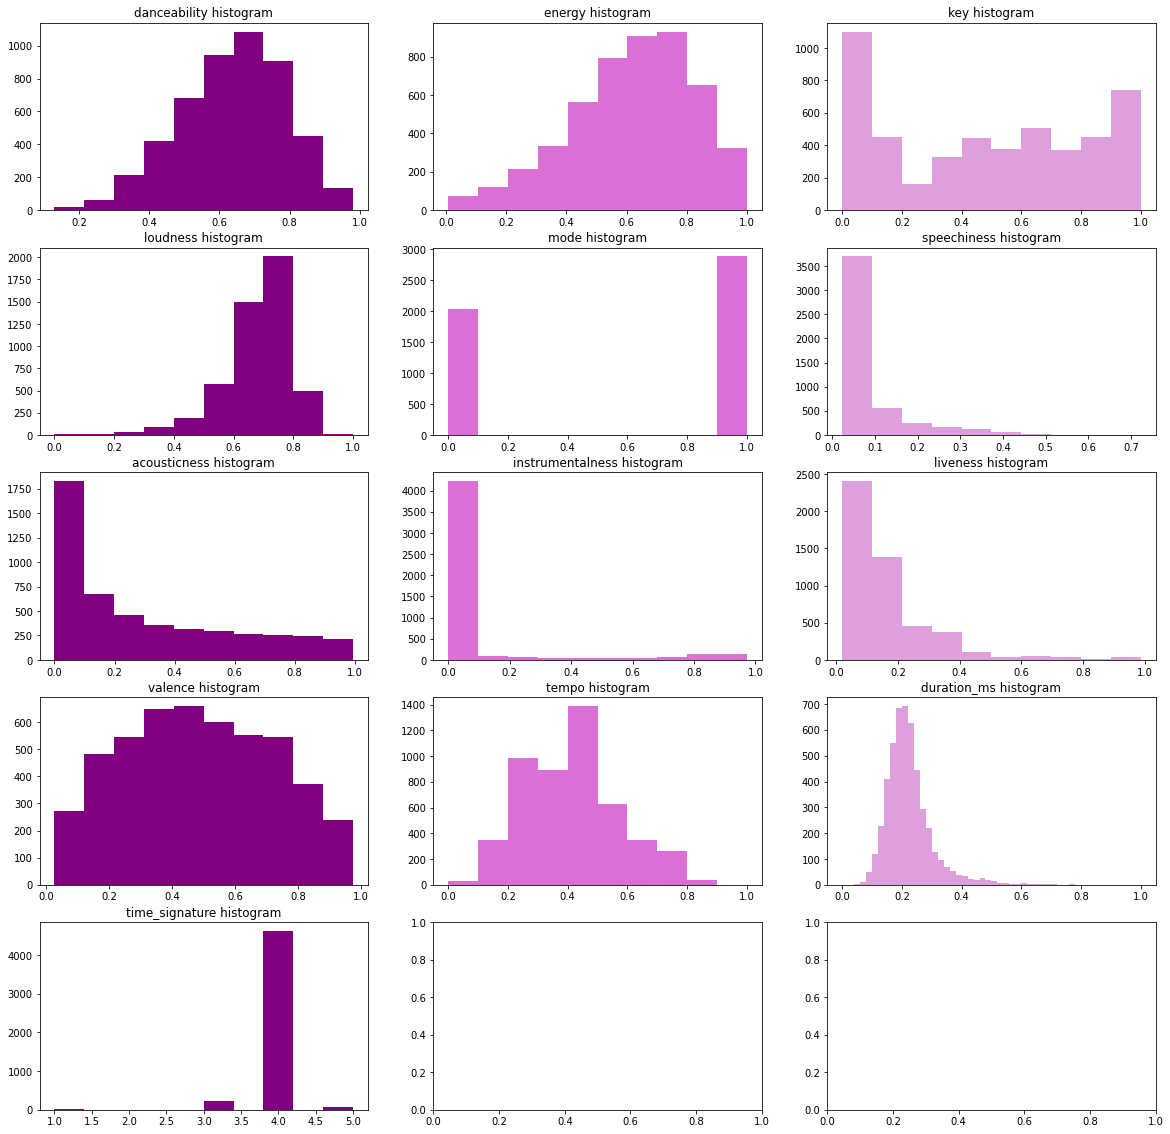

In [ ]:

fig, ax = plt.subplots(5,3, figsize=(20,20))

def hist_plot(row, column, variable, binsnum, color):
    ax[row, column].hist(dataset[variable], bins = binsnum, color = color)
    ax[row, column].set_title(variable + ' histogram')
    
hist_plot(0, 0, 'danceability', 10, 'purple')
hist_plot(0, 1, 'energy', 10, 'orchid')
hist_plot(0, 2, 'key', 10, 'plum')
hist_plot(1,0, 'loudness', 10, 'purple')
hist_plot(1,1, 'mode', 10, 'orchid')
hist_plot(1,2, 'speechiness', 10, 'plum')
hist_plot(2,0, 'acousticness', 10, 'purple')
hist_plot(2,1, 'instrumentalness', 10, 'orchid')
hist_plot(2,2, 'liveness', 10, 'plum')
hist_plot(3,0, 'valence', 10, 'purple')
hist_plot(3,1, 'tempo', 10, 'orchid')
hist_plot(3,2, 'duration_ms', 50, 'plum')
hist_plot(4,0, 'time_signature', 10, 'purple')


plt.show()

### Heatmap untuk melihat relasi antar Fitur
Fitur yang memiliki relasi/keterkaitan yang tinggi dengan fitur lain yaitu  loudness x energy (strong and positive) dan acousticness x energy (strong and negative).

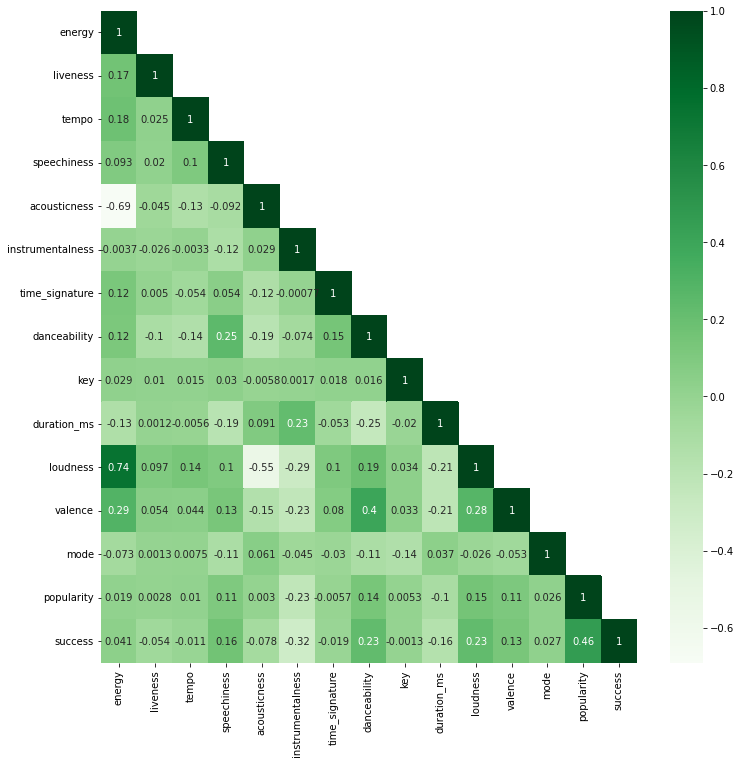

In [ ]:
plt.figure(figsize=(12,12))

corr = dataset.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask, 1)] = True

sns.heatmap(corr, mask=mask, annot=True, cmap="Greens")

### Visualisasi Antara Loudness X Energy dan Energy x Acousticness

In [ ]:
def plot_dist_reg (n_rows, n_elem, axis, features, colors, titles):
    fig, (axis) = plt.subplots(n_rows, n_elem, figsize=(15, 5))   
    itens = len(axis)
    i = 0
    while i < itens:
        axis[i] = sns.regplot(x = dataset[features[i][0]], y = dataset[features[i][1]], data=dataset, color=colors[i], line_kws={'color':'black'}, ax=axis[i])
        axis[i].set_title(titles[i])
        i+=1
    plt.subplots_adjust(wspace=0.5)
    plt.show()

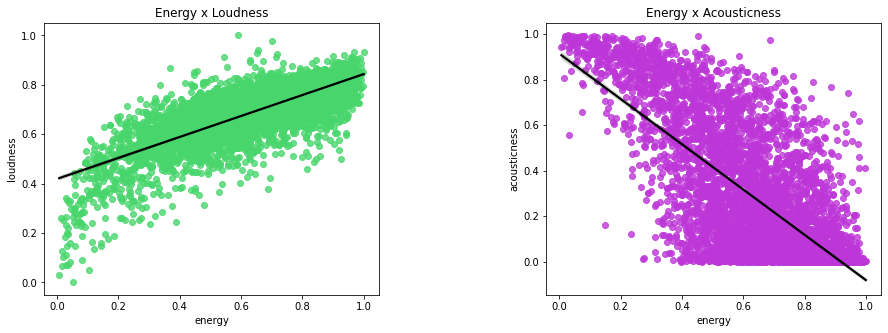

In [ ]:
axis = ['ax0','ax1']
features = [['energy','loudness'],['energy','acousticness']]
colors = ['#48d66c', '#bd36d8']
titles = ['Energy x Loudness', 'Energy x Acousticness']
plot_dist_reg(1, 2, axis, features, colors, titles)

Bisa disimpulkan bahwa tracks dengan energi lebih tinggi biasanya memiliki lebih tinggi volume dan track dengan energy rendah biasanya lagu acoustic.


### Visualisasi Kelas

In [ ]:
def show_values_on_bars(ax, h_v, space):
    if h_v == "v":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = int(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    elif h_v == "h":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="left")

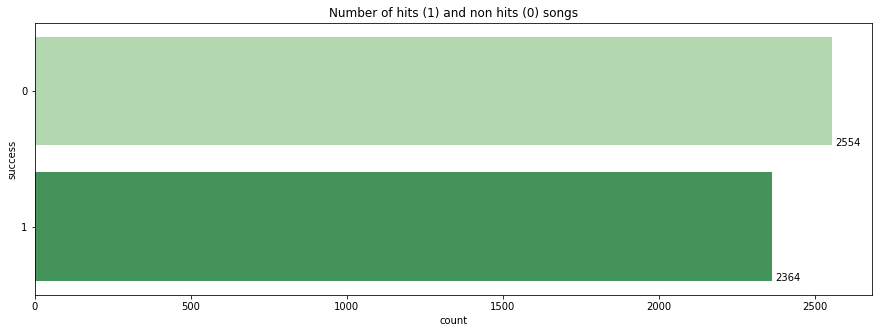

In [ ]:
plt.figure(1 , figsize = (15 , 5))
ax = sns.countplot(y = 'success', data = dataset, palette="Greens")
ax.set_title('Number of hits (1) and non hits (0) songs')
show_values_on_bars(ax, "h", 10)
plt.show()

Ternyata lebih banyak lagu yang berjenis Non Success

### Visualisasi Artis dengan Track Success Tertinggi

In [ ]:
# Get only hit songs
hits_df = dataset[dataset['success'] == 1]

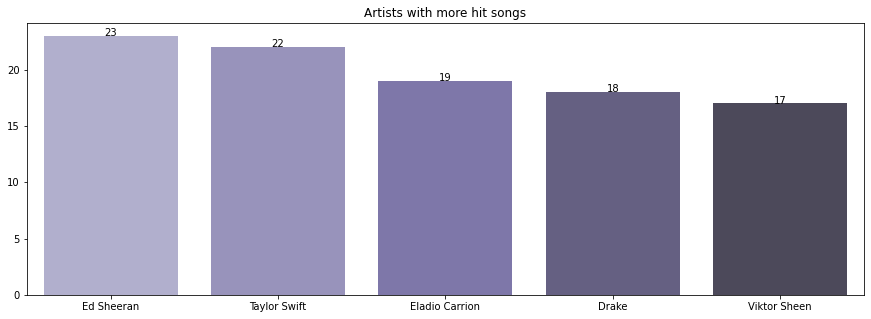

In [ ]:
top_artists = hits_df['artist'].value_counts()[:5]
name = top_artists.index.tolist()
amount = top_artists.values.tolist()

plt.figure(1 , figsize = (15, 5))
ax = sns.barplot(x = name, y = amount, palette="Purples_d")
ax.set_title('Artists with more hit songs')
show_values_on_bars(ax, "v", 10)
plt.show()

### Melihat Rata atau Tidaknya Track dengan Valence Positif/Negatif pada Data Success
Valence adalah ukuran dari 0.0 hingga 1.0 yang menggambarkan deposition musik yang disampaikan oleh suatu track. <br>
Trek dengan valence tinggi terdengar lebih positif (misalnya bahagia, ceria, euforia), sedangkan trek dengan valence rendah terdengar lebih negatif (misalnya sedih, tertekan, marah).

In [ ]:
valence = hits_df['valence'].value_counts()
valence_value = valence.index.tolist()
amount = valence.values.tolist()
i, high, low = 0, 0, 0

for v in valence_value:
    if (float(v) >= 0.5):
        high += amount[i]
    else:
        low += amount[i]
    i += 1

print('Positive tracks: ', high)
print('Negative tracks: ', low)

Positive tracks:  1232
Negative tracks:  1132


# Model dan Prediksi Data (Menggunakan Machine Learning)
Ada beberapa library machine learning yang digunakan untuk melakukan data training dan prediksi data. 

Adapun library machine learning yang digunakan: 


*   Naive Bayes
*   Logistic Regression
*   RandomForest
*   SVM









## Splitting Dataset
Dataset displit menggunakan Sklearn Model Selection. <br>
* X dan Y sebelumnya didefinisikan terlebih dahulu. Y adalah label yang ingin kita cari yaitu sukses/tidaknya suatu lagu. 
* test_size: Ukuran yang akan dijadikan testing yaitu 30% dari data keseluruhan. 
* random_state: mengontrol pengacakan yang diterapkan pada data sebelum menerapkan pemisahan. Menetapkan random_state dengan nilai yang tetap akan menjamin bahwa urutan angka acak yang sama dihasilkan setiap kali kode dijalankan. 

In [ ]:
# split for train and test set
X = dataset.drop(['success', 'artist', 'track_name'], axis=1).values
y = dataset[['success']].values

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Naive Bayes
Naive Bayes yang digunakan yaitu: 


*   Gaussian Naive Bayes : Digunakan apabila fitur yang dimiliki continous (bisa berbeda-beda)
*   Multinomial Naive Bayes : Digunakan apabila data bersifat diskrit. 
* Bernoulli Naive Bayes : Diasumsikan bahwa fitur adalah binary sehingga hanya menggunakan 2 value. 



In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train.ravel())
y_pred_gnb=gnb_model.predict(X_test)

print('Accuracy Gaussian: ', accuracy_score(y_test, y_pred_gnb))


mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train.ravel())
y_pred_mnb=mnb_model.predict(X_test)

print('Accuracy Multinomial: ', accuracy_score(y_test, y_pred_mnb))

bnb_model = BernoulliNB()
bnb_model.fit(X_train, y_train.ravel())
y_pred_bnb=bnb_model.predict(X_test)

print('Accuracy Nernoulli: ', accuracy_score(y_test, y_pred_bnb))


Accuracy Gaussian:  0.690379403794038
Accuracy Multinomial:  0.7086720867208672
Accuracy Nernoulli:  0.6551490514905149


## Logistic Regression
Logistic Regression adalah algoritma klasifikasi  yang digunakan untuk memprediksi probabilitas variabel dependen yang bersifat categorical. Dalam regresi logistik, variabel dependen adalah variabel biner yang berisi data berkode 1 (ya, berhasil, dst) atau 0 (tidak, gagal, dst). Dengan kata lain, model regresi logistik memprediksi P(Y=1) sebagai fungsi dari X.


In [ ]:
# Create the Classifier Object
lg_model = LogisticRegression(random_state=5)

# Train
lg_model.fit(X_train, y_train.ravel())

# Predict
y_pred_lg = lg_model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_lg))

print("Precision:", precision_score(y_test, y_pred_lg))

print("Recall:", recall_score(y_test, y_pred_lg))

Accuracy:  0.7953929539295393
Precision: 0.75390625
Recall: 0.8367052023121387


## Random Forest
Random Forest membangun beberapa Decision Tree dan menggabungkannya untuk mendapatkan prediksi yang lebih akurat dan stabil. <br>
Algoritma Random Forest menetapkan hasil berdasarkan prediksi Decision Tree dengan dengan mengambil rata-rata atau rata-rata output dari berbagai pohon. Meningkatkan jumlah pohon meningkatkan presisi hasil.

In [ ]:
# Create the classifier object
rf_model = RandomForestClassifier(n_estimators = 100)
# Train
rf_model.fit(X_train, y_train.ravel())
# Predict
y_pred_rf = rf_model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))

print("Precision:", precision_score(y_test, y_pred_rf))

print("Recall:", recall_score(y_test,y_pred_rf))


Accuracy:  0.8082655826558266
Precision: 0.8020679468242246
Recall: 0.7846820809248555


## SVM (Support Vector Machine)
SVM digunakan untuk mencari hyperplane terbaik dengan memaksimalkan jarak antar kelas. SVM merupakan salah satu algoritma yang paling kuat dan akurat di antara algoritma klasifikasi lainnya. SVM dapat secara efisien melakukan klasifikasi non-linier menggunakan apa yang disebut trik kernel, secara implisit memetakan inputnya ke dalam ruang fitur berdimensi tinggi.

In [ ]:
# create
svm_model_svc = svm.SVC(kernel="linear")

# Train
svm_model_svc .fit(X_train, y_train.ravel())

# Predict
y_pred_svc = svm_model_svc.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred_svc))

print("Precision:", precision_score(y_test, y_pred_svc))

print("Recall:", recall_score(y_test, y_pred_svc))

Accuracy:  0.7981029810298103
Precision: 0.7676630434782609
Recall: 0.8164739884393064


In [ ]:
# Create
svm_model_linear_svc = svm.LinearSVC()

# Train
svm_model_linear_svc .fit(X_train, y_train.ravel())

# Predict
y_pred_linear_svc = svm_model_linear_svc.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred_linear_svc))

print("Precision:", precision_score(y_test, y_pred_linear_svc))

print("Recall:", recall_score(y_test, y_pred_linear_svc))

Accuracy:  0.7933604336043361
Precision: 0.748395378690629
Recall: 0.8424855491329479


In [ ]:
# Create 
svm_model_nu_svc = svm.NuSVC()

# Train
svm_model_nu_svc.fit(X_train, y_train.ravel())

# Predict
y_pred_nu_svc = svm_model_nu_svc.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred_nu_svc))

print("Precision:", precision_score(y_test,y_pred_nu_svc))

print("Recall:", recall_score(y_test, y_pred_nu_svc))

Accuracy:  0.8021680216802168
Precision: 0.8021148036253777
Recall: 0.7673410404624278


# Evaluasi Machine Learning

## Perbandingan Akurasi
Dari semua yang digunakan, dapat dikomparasi hasil-hasil yang didapatkan. 
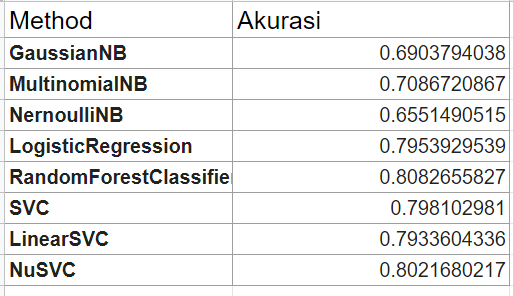
<br>Dari perbandingan, dapat dilihat bahwa yang memiliki akurasi paling tinggi adalah Random Forest. 

## Cross Check Validation
Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi.Dengan adanya cross check validation, bisa mencegah terjadinya overfitting dikarenakan dataset yang kita miliki dipisah-pisah kembali menjadi dataset yang lebih kecil.  <br>
10 fold CV adalah salah satu K fold CV yang direkomendasikan untuk pemilihan model terbaik karena cenderung memberikan estimasi akurasi yang kurang bias dibandingkan dengan CV biasa. 
 

In [ ]:
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['GaussianNB','MultinomialNB','BernoulliNB','LogisticRegression','RandomForestClassifier','SVC','LinearSVC','NuSVC']
models=[gnb_model,mnb_model,bnb_model,lg_model, rf_model,svm_model_svc,svm_model_linear_svc,svm_model_nu_svc]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe

,CV Mean,Std
GaussianNB,0.687464,0.021996
MultinomialNB,0.707798,0.024042
BernoulliNB,0.647212,0.023593
LogisticRegression,0.786077,0.023035
RandomForestClassifier,0.820240,0.021601
SVC,0.791360,0.027096
LinearSVC,0.783838,0.024978
NuSVC,0.799292,0.023347


Dari hasil yang didapatkan terlihat bahwa RandomForest juga memiliki nilai paling tinggi di antara yang lain. 

## Kesimpulan: Model Terbaik yaitu Random Forest
Dikarenakan model terlah ditemukan yang paling bagus yaitu Random Forest, maka dataset test dapat kita lakukan prediksi. 

In [ ]:
df_test = test.drop(['artist', 'track_name'], axis=1).values

test_predict = rf_model.predict(df_test)

hits_predict = (test_predict == 1).sum()

print(hits_predict, "out of", len(test_predict), "was predicted as HIT")

29 out of 100 was predicted as HIT


Dari 100 lagu pada data test, diprediksi bahwa 29 lagu diprediksi menjadi lagu HIT. 

In [ ]:
df = pd.DataFrame({'Song': test['track_name'], 'Artist': test['artist'], 'Predict': test_predict})
df.sort_values(by=['Predict'], inplace=True, ascending=False)
df.loc[df['Predict'] == 1]

,Song,Artist,Predict
58,Eyes Open (feat. Lil Baby & Young Thug),PnB Rock,1
28,We Set The Trends,Jim Jones,1
86,Hopscotch,Preme,1
20,Love Myself,Andy Grammer,1
48,Bad Bad Place,HYRA,1
67,No Choice,Tame Impala,1
83,I Really (feat. 42 Dugg & Moneybagg Yo),Hotboii,1
71,Party With You,Cobra Starship,1
72,B-Side,Khruangbin,1
49,Beg Mi Ah Link,Stefflon Don,1


Hasil yang didapatkan adalah seperti pada tabel di atas. 

### Model Menggunakan Neural Network
Neural Network diimplementasikan menggunakan library Keras. 
**Sequential** menentukan keras bahwa kita membuat model secara berurutan dan output dari setiap layer yang kita tambahkan adalah input ke layer berikutnya yang kita tentukan.
**model.add** digunakan untuk menambahkan lapisan ke jaringan. Kita perlu menentukan sebagai argumen jenis lapisan apa yang kita inginkan. Dense digunakan untuk menentukan layer yang terhubung penuh. Argumen dari Dense adalah dimensi keluaran yaitu 64 pada kasus pertama, dimensi masukan yaitu 14 (sesuai dengan jumlah fitur yang kita miliki untuk ditrain) untuk dimensi masukan dan fungsi aktivasi yang akan digunakan yang merupakan relu. Lapisan kedua serupa, kita tidak perlu menentukan dimensi input karena kita telah mendefinisikan model menjadi sekuensial sehingga keras akan secara otomatis menganggap dimensi input sama dengan output dari lapisan terakhir yaitu 8. Pada lapisan ketiga (lapisan output) dimensi output adalah 1. Sekarang seperti yang telah kita bahas sebelumnya, lapisan keluaran mengambil fungsi aktivasi yang berbeda dan untuk kasus klasifikasi ini, fungsi aktivasi yang digunakan yaitu softsign.

<br> Fungsi Softsign adalah fungsi aktivasi yang mengubah nilai antara -1 dan 1 dengan menerapkan threshold seperti fungsi sigmoid. Keuntungannya, yaitu nilai softsign adalah *zero-centered* yang membantu neuron berikutnya selama propagasi

In [ ]:

# inisialisasi
model = Sequential()

# menambahkan input layer
model.add(Dense(64, activation='relu', input_shape=(14,)))

# menambahkan hidden layer
model.add(Dense(8, activation='relu'))

# menambahkan output layer
model.add(Dense(1, activation='softsign'))

In [ ]:
# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,489
Trainable params: 1,489
Non-trainable params: 0
_________________________________________________________________


[array([[ 8.06002617e-02,  3.38115096e-02, -5.81825674e-02,
          2.10864425e-01,  1.52399629e-01,  1.76854998e-01,
         -1.52877212e-01, -2.39703372e-01,  1.69676542e-02,
         -2.03678310e-01,  1.80976480e-01,  2.05022097e-03,
         -1.35633677e-01, -7.91305006e-02,  2.59561807e-01,
          1.64533406e-01, -1.09249234e-01,  2.11414069e-01,
         -6.46760762e-02,  2.72044390e-01, -2.33145520e-01,
         -1.97908074e-01, -1.42527252e-01, -6.91413879e-04,
          1.95499659e-02,  1.35414332e-01, -2.09761262e-01,
          7.73687065e-02, -2.07055807e-02,  2.32073665e-02,
          4.34105992e-02,  5.47349751e-02,  2.61314899e-01,
          2.27321357e-01,  2.31159657e-01,  2.15631753e-01,
          1.53994650e-01,  8.86019170e-02, -1.30979121e-02,
          2.16590434e-01,  2.18541205e-01, -5.69757074e-02,
          4.33900952e-03,  1.03916228e-01, -6.48981333e-03,
          1.49571538e-01, -2.41139829e-01,  1.09981716e-01,
          2.22315043e-01,  1.74569130e-0

### Penggunaan Callback
Pada saat membuat model, kita dapat menggunakan Checkpoint untuk melakukan callback. Callback ini digunakan  gar dapat memonitor hasil model. Checkpoint akan menyimpan model terbaik tergantung dengan monitor yang digunakan. Kelas panggilan balik ModelCheckpoint memungkinkan kita menentukan di mana harus memeriksa titik-titik bobot model, bagaimana file harus dinamai dan dalam keadaan apa membuat titik pemeriksaan model. API memungkinkan kita menentukan metrik mana yang akan dipantau, seperti kehilangan atau akurasi pada set data pelatihan atau validasi. 

Pada program kami, kami menggunakan akurasi pada data validasi dan 70 epochs. 


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model.fit(X_train, y_train, epochs=70,validation_split = 0.3 ,callbacks=[checkpoint1])

Epoch 1/70
54/76 [====================>.........] - ETA: 0s - loss: 6.3211 - accuracy: 0.5017
Epoch 00001: val_accuracy improved from -inf to 0.60987, saving model to best_model1.hdf5
76/76 [==============================] - 1s 5ms/step - loss: 4.7235 - accuracy: 0.5359 - val_loss: 0.6744 - val_accuracy: 0.6099
Epoch 2/70
54/76 [====================>.........] - ETA: 0s - loss: 0.6580 - accuracy: 0.6707
Epoch 00002: val_accuracy improved from 0.60987 to 0.69603, saving model to best_model1.hdf5
76/76 [==============================] - 0s 3ms/step - loss: 0.6499 - accuracy: 0.6675 - val_loss: 0.6258 - val_accuracy: 0.6960
Epoch 3/70
54/76 [====================>.........] - ETA: 0s - loss: 0.6186 - accuracy: 0.6753
Epoch 00003: val_accuracy improved from 0.69603 to 0.72314, saving model to best_model1.hdf5
76/76 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.6899 - val_loss: 0.6029 - val_accuracy: 0.7231
Epoch 4/70
57/76 [=====================>........] - ETA

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

47/47 [==============================] - 0s 1ms/step - loss: 0.4886 - accuracy: 0.7967

Test loss: 0.49. Test accuracy: 79.67%


Akurasi yang didapatkan yaitu 79%, maka sebenarnya masih lebih bagus performa dari Random Forest. Maka dari itu, konklusi yang didapatkan bahwa model yang dapat kita gunakan yaitu Random Forest. 